# House prices prediciton

Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Prediction of house prices using different models.

### Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Read data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target = pd.read_csv("sample_submission.csv")

### Exploring the data

In [3]:
train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.isnull().sum().sum()


7829

### Cleaning data

In [7]:
test_Id = test['Id']

train = train.drop(columns=['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test = test.drop(columns=['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

train = pd.get_dummies(train)
test = pd.get_dummies(test)
target = pd.DataFrame(target['SalePrice'])

train.dropna()
test.dropna()

columns_to_fill = train.columns[train.isna().any()].tolist()

for column in columns_to_fill:
    train[column] = train[column].fillna(train[column].median())
    
columns_to_fill = test.columns[test.isna().any()].tolist()    

for column in columns_to_fill:
    test[column] = test[column].fillna(train[column].median())
    
train=train.astype(int)
test=test.astype(int)

y = train['SalePrice']

train, test = train.align(test, join='inner', axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Convert the scaled data back to a DataFrame
train_scaled = pd.DataFrame(scaled_data, columns=train.columns)

test_scaled = pd.DataFrame(test_scaled, columns=test.columns)




### Mutual info

### Visualizing mi scores

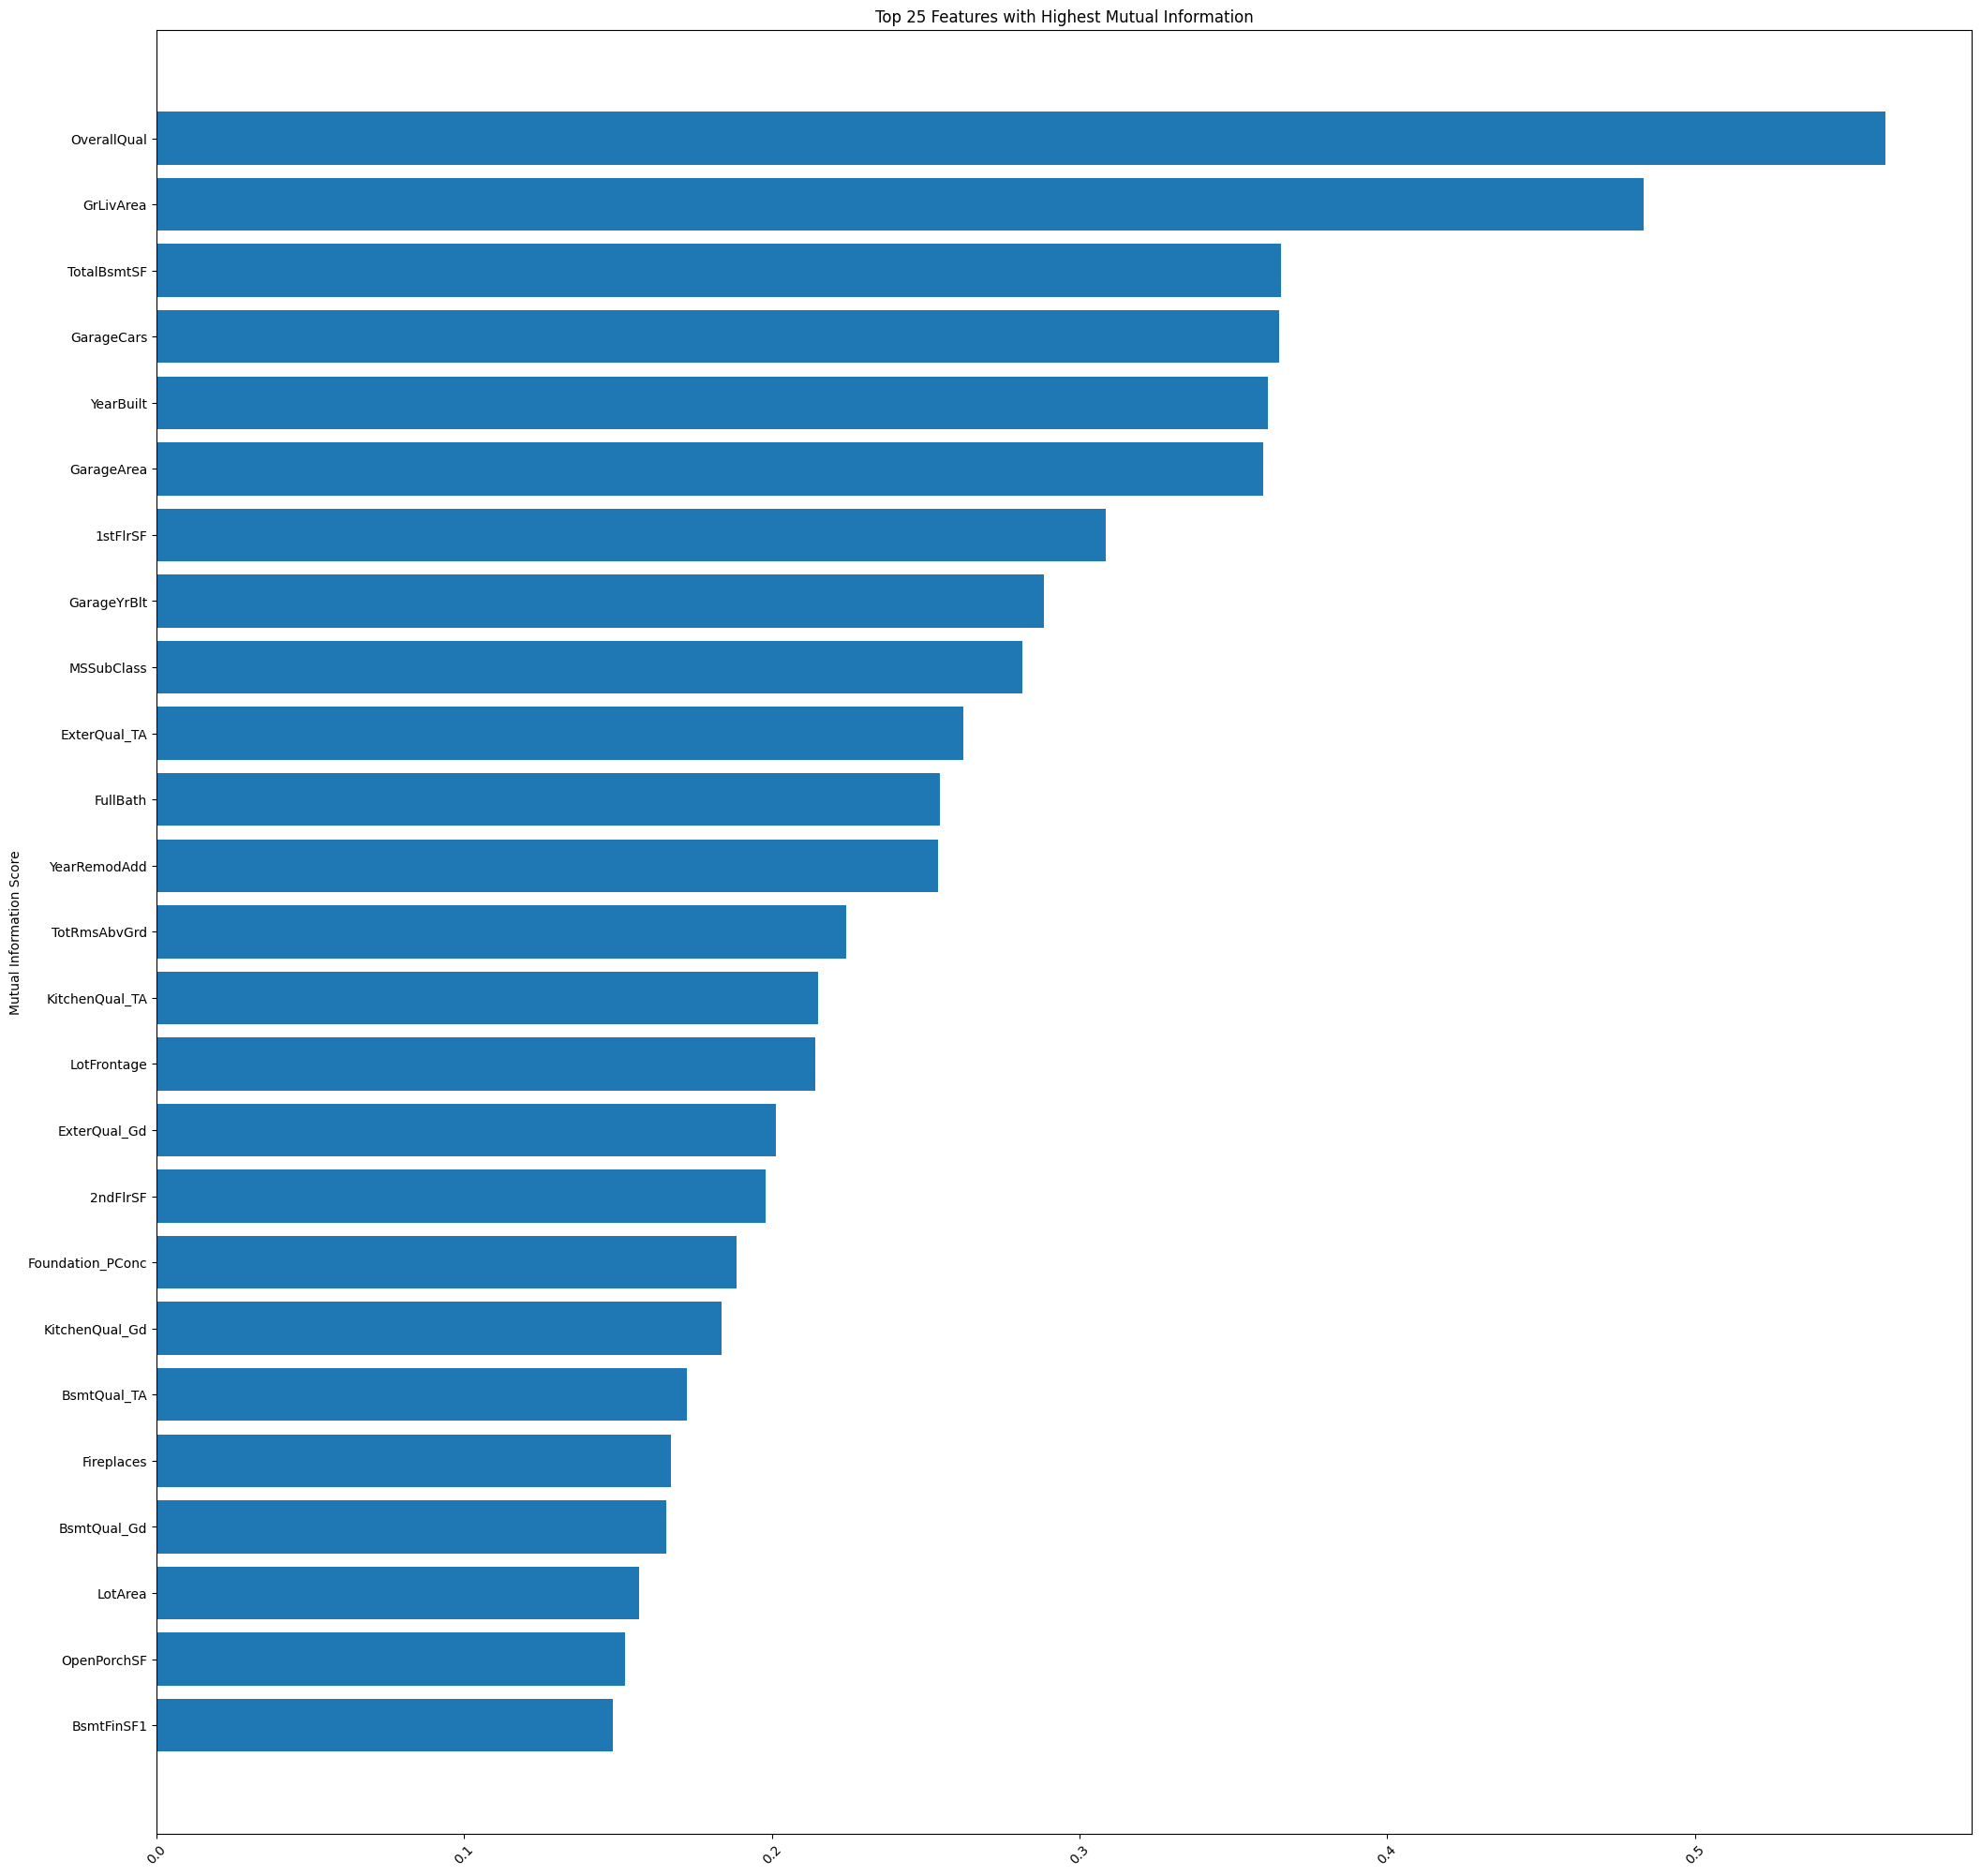

In [9]:
mutual_info_scores = mutual_info_regression(train_scaled, y)


# Get the indices of the top N features (e.g., top 10 features)
top_features_indices = np.argsort(mutual_info_scores)[-25:]

# Select and plot only the top N features
top_features = train_scaled.iloc[:, top_features_indices]
plt.figure(figsize=(25, 25))
plt.barh(top_features.columns, mutual_info_scores[top_features_indices])
plt.ylabel('Mutual Information Score')
plt.title('Top 25 Features with Highest Mutual Information')
plt.xticks(rotation=45)
plt.show()

### Models

 Compare models efficiency and take the most accurate

In [10]:
#random forest regressor 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()



X_train,X_test,y_train,y_test = train_test_split(train_scaled,y,test_size=0.2)

model.fit(X_train,y_train)
# pred = model.predict(X_test)
# print(mean_absolute_error(y_test,pred))
model.score(X_test,y_test)

0.8645844022552307

In [11]:
#gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()


gbr.fit(X_train,y_train)
# print(mean_absolute_error(y_test,gbr_pred))
gbr.score(X_test,y_test)

0.8903132052611149

In [12]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)
# ada_pred = ada.predict(X_test)
# print(mean_absolute_error(y_test,ada_pred))
ada.score(X_test,y_test)

0.7883812861584715

### prediction with gradient boosting

In [13]:
#prediction with gradient boosting
predictions = gbr.predict(test_scaled)

### kaggle submission file

In [15]:
output = pd.DataFrame({'Id': test_Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

# end result: 0.13983 (Kaggle score)